In [1]:
# import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
%reload_ext sql
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///:default:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [18]:
# Plot display settings
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams['font.family'] = ['Inter', 'sans-serif']

pd.set_option('display.max_colwidth', 3000)
pd.set_option("display.max_columns", None)

# Analyzing play-by-play data

In [20]:
%sql play_by_play << SELECT * FROM read_csv_auto('../archive/csv/play_by_play.csv') ORDER BY game_id DESC, wctimestring LIMIT 40;
play_by_play.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
0,0029901189,0,12,0,1,12:50 PM,12:00,NaN,Start of 1st Period (12:50 PM EST),NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
1,0029901189,3,4,0,1,2:16 PM,11:44,Lewis REBOUND (Off:0 Def:1),NaN,NaN,NaN,NaN,4.0,1740,Rashard Lewis,1.610613e+09,Seattle,SuperSonics,SEA,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
2,0029901189,1,10,0,1,2:16 PM,12:00,Jump Ball Baker vs. Olowokandi: Tip to Odom,NaN,NaN,NaN,NaN,4.0,452,Vin Baker,1.610613e+09,Seattle,SuperSonics,SEA,5.0,1709,Michael Olowokandi,1.610613e+09,Los Angeles,Clippers,LAC,5.0,1885,Lamar Odom,1.610613e+09,Los Angeles,Clippers,LAC,0
3,0029901189,2,2,1,1,2:16 PM,11:46,NaN,NaN,MISS Olowokandi 11' Jump Shot,NaN,NaN,5.0,1709,Michael Olowokandi,1.610613e+09,Los Angeles,Clippers,LAC,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
4,0029901189,5,4,0,1,2:17 PM,11:31,Borrell REBOUND (Off:1 Def:0),NaN,NaN,NaN,NaN,4.0,1953,Lazaro Borrell,1.610613e+09,Seattle,SuperSonics,SEA,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0


In [4]:
%%sql play_by_play_n_games <<
SELECT extract(year from game.game_date) as year, count(*) as n_games
FROM 
(
  SELECT game_id
  FROM read_csv_auto('../archive/csv/play_by_play.csv') as pbp
  GROUP BY game_id
) as pbp
LEFT JOIN read_csv_auto('../archive/csv/game.csv') as game ON pbp.game_id = game.game_id
GROUP BY extract(year from game.game_date)
ORDER BY year
;

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [5]:
play_by_play_n_games: pd.DataFrame

<AxesSubplot:xlabel='year'>

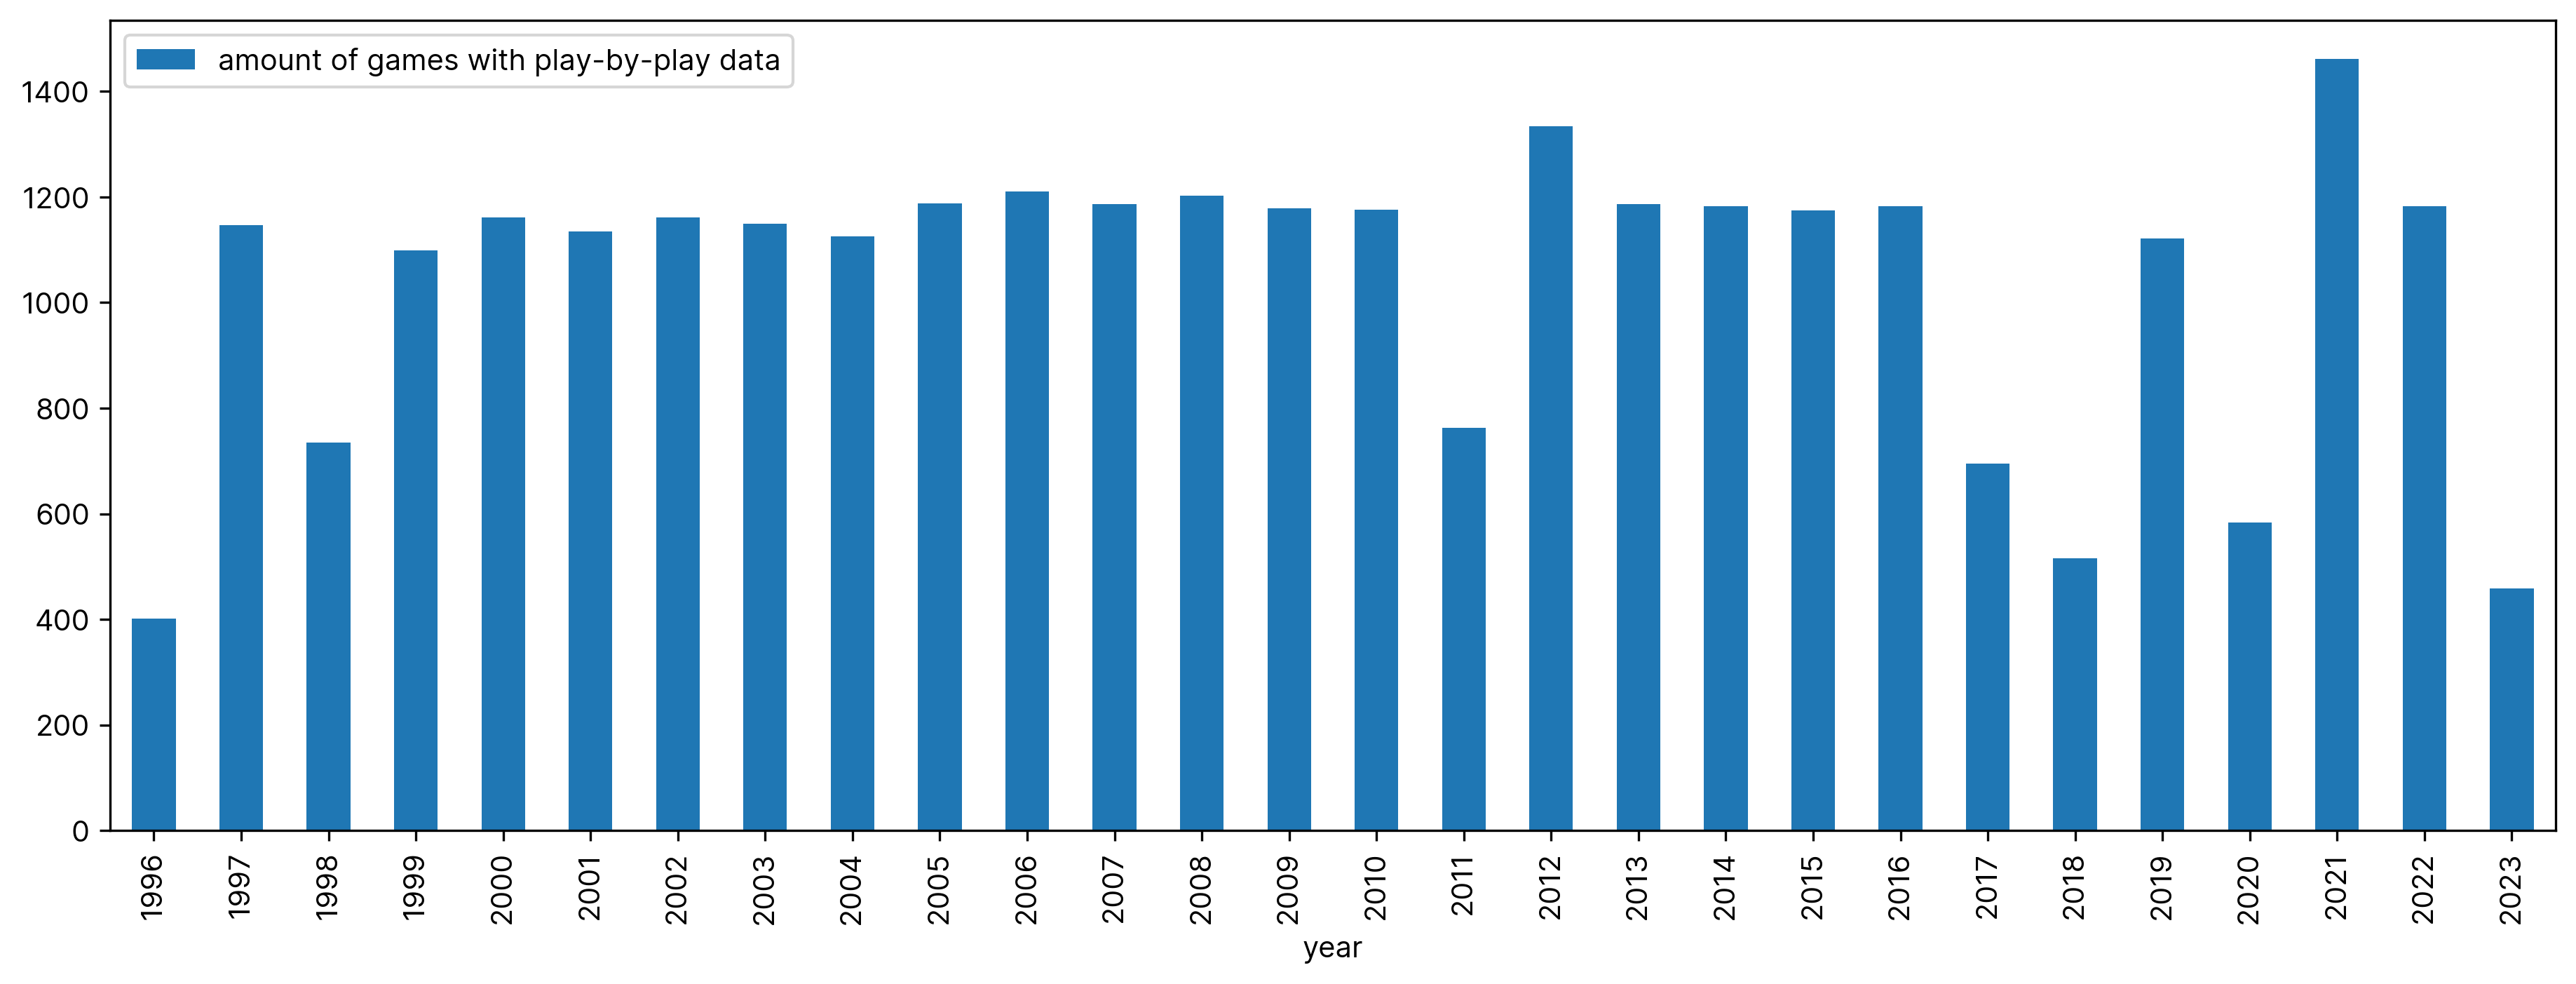

In [14]:
play_by_play_n_games.plot.bar(x='year', y='n_games', figsize=(15, 5), label="amount of games with play-by-play data")